In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/PCOS_detection/results.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

,Timestamp,Period Length,Cycle Length,Age,City,PCOS tested,PCOS,PCOS from age of,Overweight,loss weight gain / weight loss,...,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,When do you experience mood swings?,exercise per week,eat outside per week,canned food often,relocated city
0,2-12-2020 15:25:52,4-5 days,Keeps Variating,18-25,Mumbai,No,No,NaN,NaN,No,...,Yes,Yes,No,No,No,During Periods,0,4,No,No
1,2-12-2020 15:26:55,4-5 days,20-28 days,18-25,Mumbai,No,No,NaN,No,Yes,...,No,Yes,No,Yes,Yes,Both times,1,1,No,No
2,2-12-2020 15:28:21,4-5 days,29-35 days,18-25,Mumbai,Yes,Yes,20,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Both times,1,4,Yes,No
3,2-12-2020 15:34:14,4-5 days,29-35 days,18-25,Mumbai,No,No,NaN,NaN,No,...,No,No,No,Yes,No,Before Periods,5,1,No,No
4,2-12-2020 15:39:46,4-5 days,20-28 days,18-25,Thane,No,No,NaN,NaN,No,...,Yes,No,Yes,Yes,Yes,Before Periods,0,4,No,No


In [ ]:
data.drop('Timestamp', inplace=True, axis=1)
data.drop('PCOS tested', inplace=True, axis=1)
data.drop('When do you experience mood swings?', inplace=True, axis=1)

In [ ]:
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS from age of,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,Mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,No
1,4-5 days,20-28 days,18-25,Mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,No
2,4-5 days,29-35 days,18-25,Mumbai,Yes,20,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
3,4-5 days,29-35 days,18-25,Mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,No
4,4-5 days,20-28 days,18-25,Thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,No


In [ ]:
data["City"] = data["City"].str.lower()

In [ ]:
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS from age of,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,No
1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,No
2,4-5 days,29-35 days,18-25,mumbai,Yes,20,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,No
4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,No


In [ ]:
data = data.rename(columns={'PCOS from age of': 'PCOS_from'})

data['PCOS_from'] = data.PCOS_from.str.extract('(\d+)')

data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,No
1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,No
2,4-5 days,29-35 days,18-25,mumbai,Yes,20,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,No
4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,No


In [ ]:
#data.to_csv(r'/content/drive/MyDrive/PCOS_detection/data1.csv', index=False)
data.dropna(subset=["PCOS_from"], inplace=True)


In [ ]:
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
2,4-5 days,29-35 days,18-25,mumbai,Yes,20,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
8,6-7 days,20-28 days,18-25,mumbai,Yes,20,No,No,No,Not Applicable,...,moderate,Yes,Yes,No,No,Yes,3,2,No,No
11,6-7 days,Keeps Variating,18-25,mumbai,Yes,17,Yes,Yes,Yes,Not Applicable,...,normal,Yes,No,Yes,No,Yes,2,7,No,Yes
14,4-5 days,25-28,18-25,mumbai,Yes,21,Yes,Yes,Yes,Not Applicable,...,normal,Yes,Yes,No,No,Yes,4,1,No,No
22,4-5 days,Keeps Variating,18-25,thane,Yes,21,Maybe,Yes,Yes,Not Applicable,...,moderate,Yes,Yes,Yes,Yes,Yes,0,3,No,No


In [ ]:
data.to_csv(r'/content/drive/MyDrive/PCOS_detection/onlyPCOS.csv', index=False)

In [ ]:
path1 = "/content/drive/MyDrive/PCOS_detection/allData.csv"
data = pd.read_csv(path1)

In [ ]:
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,No
1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,No
2,4-5 days,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,No
4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,No


In [ ]:
def label5(row):
    if row['Hair growth on Chin'] == 'normal':
        return 0
    elif row['Hair growth on Chin'] == 'moderate':
        return 1
    else:
        return 2


In [ ]:
data['Hair growth on Chin'] = data.apply(lambda row: label5(row), axis=1)
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,No
1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,No
2,4-5 days,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,No
3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,No
4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,No


In [ ]:
def label16(row):
    if row['relocated city'] == 'Yes':
        return 1
    else:
        return 0

In [ ]:
data['relocated city'] = data.apply(lambda row: label16(row), axis=1)
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,4-5 days,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,0
4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
data.tail()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
262,6-7 days,25-28,36-40,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,No,No,6,1,No,0
263,6-7 days,29-35 days,18-25,delhi,No,NaN,NaN,No,No,Not Applicable,...,moderate,Yes,Yes,Yes,No,No,1,6,No,0
264,4-5 days,25-28,18-25,udaipur,No,NaN,No,No,No,Not Applicable,...,normal,No,No,No,No,No,2,3,No,0
265,6-7 days,20-24 days,18-25,mumbai,No,NaN,No,No,No,Not Applicable,...,excessive,Yes,Yes,No,Yes,No,5,4,Yes,1
266,4-5 days,25-28,31-35,mumbai,No,NaN,NaN,No,No,No,...,normal,Yes,Yes,No,No,No,3,1,No,0


In [ ]:
from google.colab import files
data.to_csv('data.csv')
files.download("data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def label17(row):
    if row['Period Length'] == '2-3 days':
        return 3
    elif row['Period Length'] == '4-5 days':
        return 5
    elif row['Period Length'] == '6-7 days':
        return 7
    else:
        return 9

In [ ]:
data['Period Length'] = data.apply(lambda row: label17(row), axis=1)
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,5,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,5,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,5,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,5,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,0
4,5,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
def label18(row):
    if row['Cycle Length'] == '20-24 days':
        return 22
    elif row['Cycle Length'] == '20-28 days':
        return 25
    elif row['Cycle Length'] == '25-28':
        return 27
    elif row['Cycle Length'] == '29-35 days':
        return 32
    elif row['Cycle Length'] == '36+ days':
        return 37
    else:
        return 'NaN'

In [ ]:
data['Cycle Length'] = data.apply(lambda row: label18(row), axis=1)
data.head()

,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,5,NaN,18-25,mumbai,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,5,25,18-25,mumbai,No,NaN,No,Yes,No,Not Applicable,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,5,32,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,5,32,18-25,mumbai,No,NaN,NaN,No,No,Not Applicable,...,normal,No,No,No,Yes,No,5,1,No,0
4,5,25,18-25,thane,No,NaN,NaN,No,Yes,Not Applicable,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
del data['PCOS_from']

In [ ]:
data

,Period Length,Cycle Length,Age,City,PCOS,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,Hair growth on Chin,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,5,NaN,18-25,mumbai,No,NaN,No,Yes,Not Applicable,1,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,5,25,18-25,mumbai,No,No,Yes,No,Not Applicable,1,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,5,32,18-25,mumbai,Yes,Yes,Yes,Yes,Yes,1,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,5,32,18-25,mumbai,No,NaN,No,No,Not Applicable,0,...,normal,No,No,No,Yes,No,5,1,No,0
4,5,25,18-25,thane,No,NaN,No,Yes,Not Applicable,1,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,7,27,36-40,mumbai,No,NaN,No,No,Not Applicable,0,...,normal,No,No,No,No,No,6,1,No,0
263,7,32,18-25,delhi,No,NaN,No,No,Not Applicable,0,...,moderate,Yes,Yes,Yes,No,No,1,6,No,0
264,5,27,18-25,udaipur,No,No,No,No,Not Applicable,0,...,normal,No,No,No,No,No,2,3,No,0
265,7,22,18-25,mumbai,No,No,No,No,Not Applicable,1,...,excessive,Yes,Yes,No,Yes,No,5,4,Yes,1


In [ ]:
from google.colab import files
data.to_csv('data_final.csv')
files.download("data_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
path = "/content/data.csv"
data1 = pd.read_csv(path)
data1.head()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,0,4-5 days,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,1,4-5 days,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,2,4-5 days,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,3,4-5 days,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,...,normal,No,No,No,Yes,No,5,1,No,0
4,4,4-5 days,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
def label17(row):
    if row['Period Length'] == '2-3 days':
        return 3
    elif row['Period Length'] == '4-5 days':
        return 5
    elif row['Period Length'] == '6-7 days':
        return 7
    else:
        return 9

In [ ]:
data1['Period Length'] = data.apply(lambda row: label17(row), axis=1)
data1.head()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,0,9,Keeps Variating,18-25,mumbai,No,NaN,NaN,No,Yes,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,1,9,20-28 days,18-25,mumbai,No,NaN,No,Yes,No,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,2,9,29-35 days,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,3,9,29-35 days,18-25,mumbai,No,NaN,NaN,No,No,...,normal,No,No,No,Yes,No,5,1,No,0
4,4,9,20-28 days,18-25,thane,No,NaN,NaN,No,Yes,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
def label18(row):
    if row['Cycle Length'] == '20-24 days':
        return 1
    elif row['Cycle Length'] == '20-28 days':
        return 2
    elif row['Cycle Length'] == '25-28':
        return 3
    elif row['Cycle Length'] == '29-35 days':
        return 4
    elif row['Cycle Length'] == '36+ days':
        return 5
    else:
        return 6

In [ ]:
data1['Cycle Length'] = data.apply(lambda row: label18(row), axis=1)
data1.head()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,0,9,6,18-25,mumbai,No,NaN,NaN,No,Yes,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,1,9,6,18-25,mumbai,No,NaN,No,Yes,No,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,2,9,6,18-25,mumbai,Yes,20.0,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,3,9,6,18-25,mumbai,No,NaN,NaN,No,No,...,normal,No,No,No,Yes,No,5,1,No,0
4,4,9,6,18-25,thane,No,NaN,NaN,No,Yes,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
def label19(row):
    if row['Age'] == 'Below 18':
        return 1
    elif row['Age'] == '18-25':
        return 2
    elif row['Age'] == '26-30':
        return 3
    elif row['Age'] == '31-35':
        return 4
    elif row['Age'] == '36-40':
        return 5
    elif row['Age'] == '41-45':
        return 6
    else:
        return 7

In [ ]:
data1['Age'] = data.apply(lambda row: label19(row), axis=1)
data1.head()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,0,9,6,2,mumbai,No,NaN,NaN,No,Yes,...,normal,Yes,Yes,No,No,No,0,4,No,0
1,1,9,6,2,mumbai,No,NaN,No,Yes,No,...,moderate,No,Yes,No,Yes,Yes,1,1,No,0
2,2,9,6,2,mumbai,Yes,20.0,Yes,Yes,Yes,...,moderate,Yes,Yes,Yes,Yes,Yes,1,4,Yes,0
3,3,9,6,2,mumbai,No,NaN,NaN,No,No,...,normal,No,No,No,Yes,No,5,1,No,0
4,4,9,6,2,thane,No,NaN,NaN,No,Yes,...,normal,Yes,No,Yes,Yes,Yes,0,4,No,0


In [ ]:
from google.colab import files
data1.to_csv('data_cleaned.csv')
files.download("data_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import Image
#from sklearn.externals.six import StringIO
from six import StringIO
import pickle
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/PCOS_detection/clean_data.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
0,0,5,6,2,mumbai,No,NaN,0,0,1,...,0,1,1,0,0,0,0,4,0,0
1,1,5,2,2,mumbai,No,NaN,0,1,0,...,1,0,1,0,1,1,1,1,0,0
2,2,5,4,2,mumbai,Yes,20.0,1,1,1,...,1,1,1,1,1,1,1,4,1,0
3,3,5,4,2,mumbai,No,NaN,0,0,0,...,0,0,0,0,1,0,5,1,0,0
4,4,5,2,2,thane,No,NaN,0,0,1,...,0,1,0,1,1,1,0,4,0,0


In [ ]:
data.tail()

,Unnamed: 0,Period Length,Cycle Length,Age,City,PCOS,PCOS_from,Overweight,loss weight gain / weight loss,irregular or missed periods,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,relocated city
262,262,7,3,5,mumbai,No,NaN,0,0,0,...,0,0,0,0,0,0,6,1,0,0
263,263,7,4,2,delhi,No,NaN,0,0,0,...,1,1,1,1,0,0,1,6,0,0
264,264,5,3,2,udaipur,No,NaN,0,0,0,...,0,0,0,0,0,0,2,3,0,0
265,265,7,1,2,mumbai,No,NaN,0,0,0,...,2,1,1,0,1,0,5,4,1,1
266,266,5,3,4,mumbai,No,NaN,0,0,0,...,0,1,1,0,0,0,3,1,0,0


In [ ]:
del data['PCOS_from']

del data['City']

del data['relocated city']

del data['Unnamed: 0']

In [ ]:
data['PCOS_label'] = None
data.head()

,Period Length,Cycle Length,Age,PCOS,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,Hair growth on Chin,Hair growth on Cheeks,...,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often,PCOS_label
0,5,6,2,No,0,0,1,0,1,0,...,0,1,1,0,0,0,0,4,0,None
1,5,2,2,No,0,1,0,0,1,1,...,1,0,1,0,1,1,1,1,0,None
2,5,4,2,Yes,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,1,None
3,5,4,2,No,0,0,0,0,0,0,...,0,0,0,0,1,0,5,1,0,None
4,5,2,2,No,0,0,1,0,1,0,...,0,1,0,1,1,1,0,4,0,None


In [ ]:
data = data.set_index('PCOS_label')

data = data.reset_index()

In [ ]:
def label(row):
    if row['PCOS'] == 'Yes':
        return 1
    else:
        return 0

In [ ]:
data['PCOS_label'] = data.apply(lambda row: label(row), axis=1)

data.head()

,PCOS_label,Period Length,Cycle Length,Age,PCOS,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,Hair growth on Chin,...,Hair growth in Arms,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often
0,0,5,6,2,No,0,0,1,0,1,...,0,0,1,1,0,0,0,0,4,0
1,0,5,2,2,No,0,1,0,0,1,...,2,1,0,1,0,1,1,1,1,0
2,1,5,4,2,Yes,1,1,1,1,1,...,1,1,1,1,1,1,1,1,4,1
3,0,5,4,2,No,0,0,0,0,0,...,0,0,0,0,0,1,0,5,1,0
4,0,5,2,2,No,0,0,1,0,1,...,1,0,1,0,1,1,1,0,4,0


In [ ]:
PCOS_check = dict(zip(data.PCOS_label.unique(), data.PCOS.unique()))
PCOS_check

{0: 'No', 1: 'Yes'}

In [ ]:
X = data.drop(['PCOS_label', 'PCOS'], axis=1)
y = data.PCOS_label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.head()

y_train.head()

103    1
18     0
204    1
176    0
89     1
Name: PCOS_label, dtype: int64

In [ ]:
X_test.head()

,Period Length,Cycle Length,Age,Overweight,loss weight gain / weight loss,irregular or missed periods,Difficulty in conceiving,Hair growth on Chin,Hair growth on Cheeks,Hair growth Between breasts,...,Hair growth in Arms,Hair growth on Inner thighs,Acne or skin tags,Hair thinning or hair loss,Dark patches,always tired,more Mood Swings,exercise per week,eat outside per week,canned food often
180,9,5,7,0,1,0,1,2,1,2,...,0,0,1,1,1,1,1,0,0,0
73,5,1,2,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,3,3,0
214,5,3,7,1,1,1,0,0,0,0,...,0,0,1,1,1,1,1,0,1,0
8,7,2,2,0,0,0,0,1,0,0,...,1,1,1,1,0,0,1,3,2,0
261,3,3,2,0,1,0,0,0,0,1,...,1,2,1,1,1,1,1,0,3,0


In [ ]:
clf = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)


In [ ]:
tree_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)
print(confusion)

[[47  3]
 [10  7]]


In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, tree_predicted)))

Accuracy: 0.81
Precision: 0.70
Recall: 0.41
F1: 0.52


In [ ]:
print(classification_report(
    y_test, tree_predicted, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.82      0.94      0.88        50
         Yes       0.70      0.41      0.52        17

    accuracy                           0.81        67
   macro avg       0.76      0.68      0.70        67
weighted avg       0.79      0.81      0.79        67



In [ ]:
print('Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))

Accuracy on training set: 0.95


In [ ]:
print('Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy on test set: 0.81


In [ ]:
feature_cols = ['Period Length', 'Cycle Length', 'Age', 'Overweight', 'loss weight gain / weight loss', 'irregular or missed periods', 'Difficulty in conceiving', 'Hair growth on Chin', 'Hair growth  on Cheeks', 'Hair growth Between breasts',
                'Hair growth  on Upper lips ', 'Hair growth in Arms', 'Hair growth on Inner thighs', 'Acne or skin tags', 'Hair thinning or hair loss ', 'Dark patches', 'always tired', 'more Mood Swings', 'exercise per week', 'eat outside per week', 'canned food often']


In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

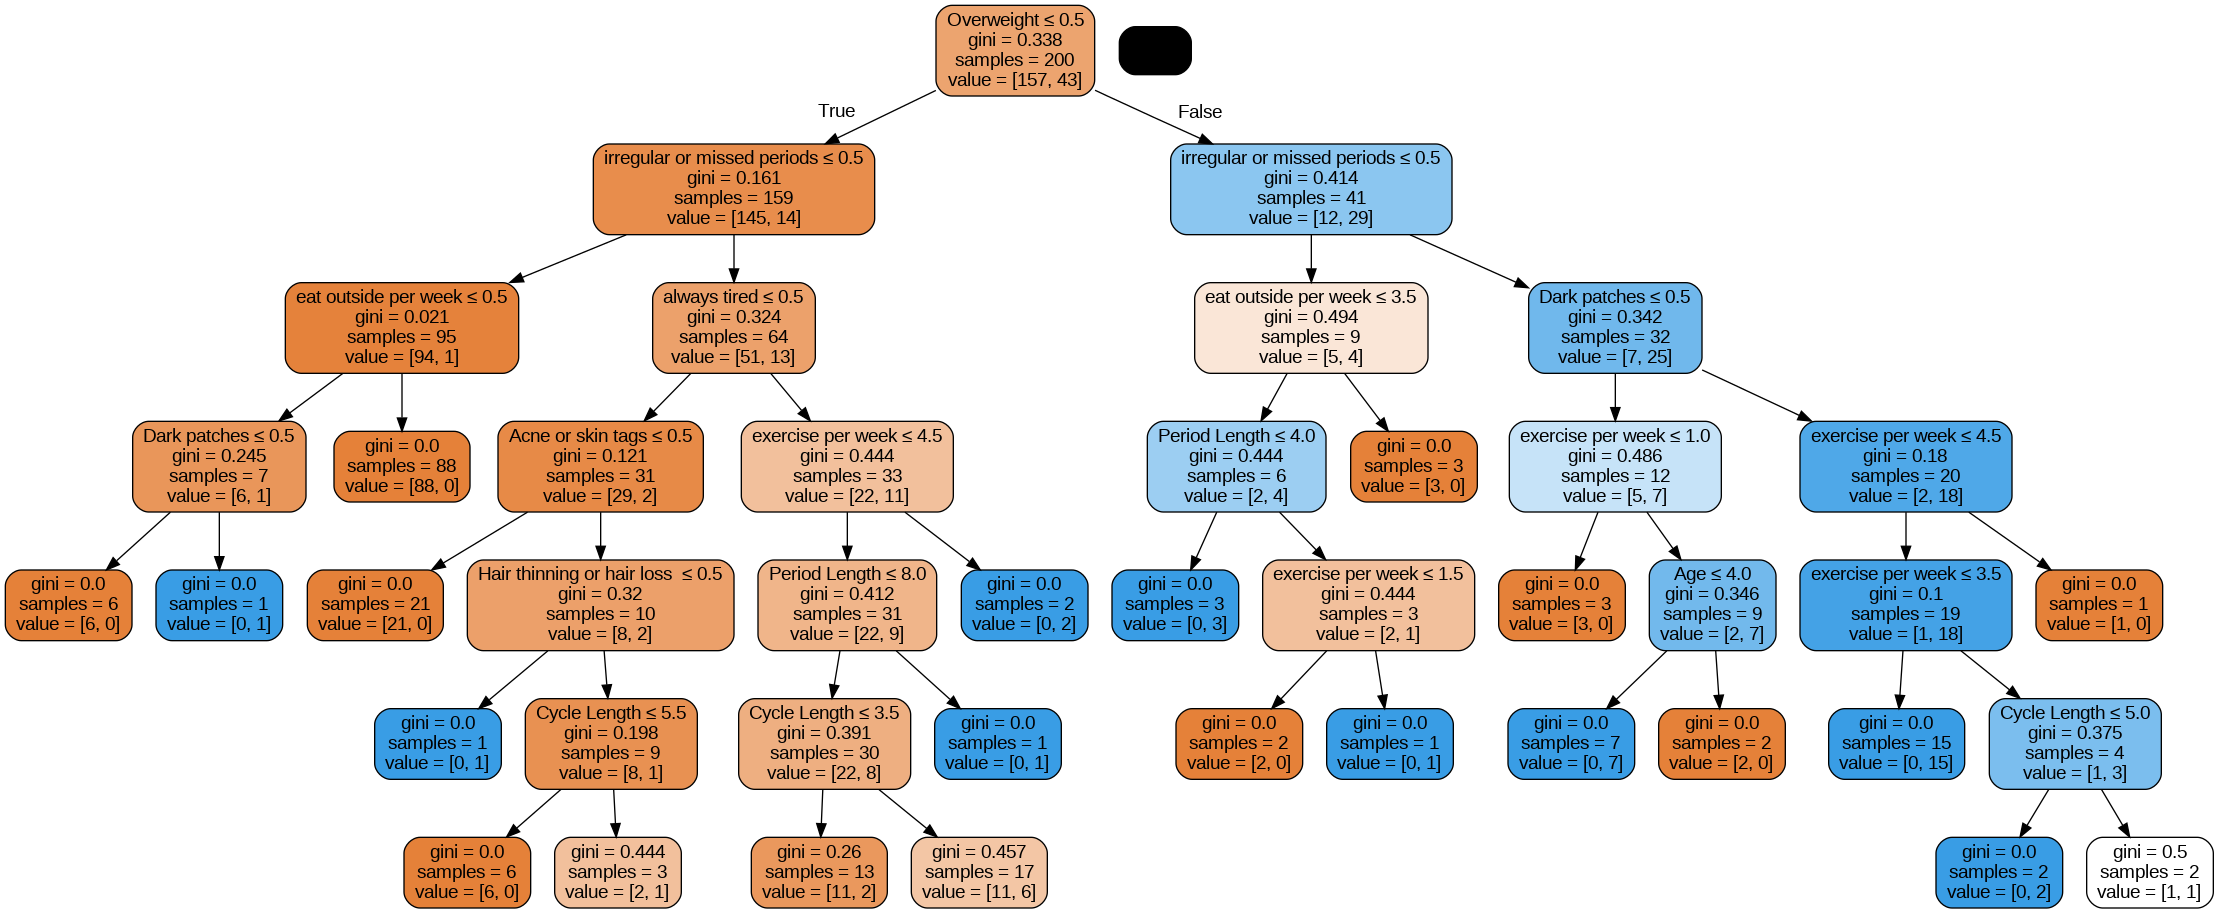

In [ ]:
Image(graph.create_png())

In [ ]:
pcos_prediction = clf.predict(X_test)
PCOS_check[pcos_prediction[0]]

'Yes'

In [ ]:
pcos1 = clf.predict(
    [[5, 6,	2,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	7,	0]])
PCOS_check[pcos1[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Yes'

In [ ]:
pcos2 = clf.predict(
    [[5,	1,	2,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	3,	3,	0]])
PCOS_check[pcos2[0]]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'No'

In [ ]:
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
result = loaded_model.predict(
    [[5,	25,	2,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	3,	3,	0]])
print(result)
PCOS_check[result[0]]

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'No'

In [ ]:
#!pip install flask_ngrok

In [ ]:
 #!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

In [ ]:
#!ls

In [ ]:
#!ngrok config add-authtoken 2XdEhfGWs69EXIwC3wUydof8aTn_6ns2LYrh6tR8rgsLmqYSc

In [ ]:
'''from flask_ngrok import run_with_ngrok
from flask import Flask,request,render_template
import pickle
import numpy as np
'''

'from flask_ngrok import run_with_ngrok\nfrom flask import Flask,request,render_template\nimport pickle\nimport numpy as np\n'

In [ ]:
'''app = Flask(__name__)
run_with_ngrok(app)
model=pickle.load(open('/content/drive/MyDrive/PCOS_detection/model.pkl','rb'))
@app.route('/')
def home():
  return render_template('/content/drive/MyDrive/PCOS_detection/htm.html')
@app.route('/getprediction',methods=['POST'])
def getprediction():
  input = [float(x) for x in request.form.values()]
  final_input=[np.array(input)]
  prediction=model.predict(final_input)
  return render_template('/content/drive/MyDrive/PCOS_detection/htm.html',output='The person has '.format(prediction))


app.run()
'''

"app = Flask(__name__)\nrun_with_ngrok(app)\nmodel=pickle.load(open('/content/drive/MyDrive/PCOS_detection/model.pkl','rb'))\n@app.route('/')\ndef home():\n  return render_template('/content/drive/MyDrive/PCOS_detection/htm.html')\n@app.route('/getprediction',methods=['POST'])\ndef getprediction():\n  input = [float(x) for x in request.form.values()]\n  final_input=[np.array(input)]\n  prediction=model.predict(final_input)\n  return render_template('/content/drive/MyDrive/PCOS_detection/htm.html',output='The person has '.format(prediction))\n\n\napp.run()\n"

In [ ]:
!pip install flask

In [ ]:
from flask import Flask, render_template, request, jsonify
import joblib  # or any other library to load your machine learning model

app = Flask(__name__)

# Load your machine learning model
# Replace 'your_model_file.pkl' with the actual filename
model = joblib.load('model.pkl')

@app.route('/')
def home():
    return render_template('htm.html')

@app.route('/predict', methods=['POST'])
def predict():
    data=request.get_json()
    # Get input data from the form
    # input_data = [float(request.form['feature1']), float(request.form['feature2']), ...]  # Add all the features needed for your model

    # Make prediction using the loaded model
    # prediction = model.predict([input_data])[0]

    # You can format the prediction as needed
    # result = {'prediction': prediction}

    return jsonifi({'data':data})

if __name__ == '__main__':
    app.run(port=5005)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5005
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from flask import Flask, request, jsonify
import loaded_model

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    # Assuming 'your_ml_model.predict' takes input data and returns predictions
    prediction = model.predict(data)
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'loaded_model'